In [1]:
import pandas as pd
import re
import gensim
from gensim.models import Word2Vec
import numpy as np
from scipy import linalg

In [2]:
data = pd.read_csv("./amazon_co-ecommerce_sample.csv")

In [3]:
data

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
5,cb34f0a84102c1ebc3ef6892d7444d36,20pcs Model Garden Light Double Heads Lamppost...,Generic,£6.99,NaN,2,1.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Lighti...,http://www.amazon.co.uk/Single-Head-Garden-Lig...,These delicate model garden lights are mainly ...,Technical Details Manufacturer recommended age...,These delicate model garden lights are mainly ...,http://www.amazon.co.uk/Single-Head-Garden-Lig...,is it possible to replace thr grain of wheat l...,Five Stars // 5.0 // 27 Dec. 2014 // By\n \...,"{""seller""=>{""Seller_name_1""=>""STK e-Shop"", ""Se..."
6,f74b562470571dfb689324adf236f82c,Hornby 00 Gauge 230mm BR Bogie Passenger Brake...,Hornby,£24.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R4388-RailRoad-...,Product Description Hornby BR bogie passenger ...,Technical Details Item Weight222 g Product Dim...,Product Description Hornby BR bogie passenger ...,NaN,NaN,"High standard model, well worth the wait. Repl...","{""sell

# Data Preprocessing

In [4]:
data.isnull().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

In [5]:
data.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                           object
number_available_in_stock                       object
number_of_reviews                               object
number_of_answered_questions                   float64
average_review_rating                           object
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
sellers                                         object
dtype: object

In [6]:
data['manufacturer'] = data['manufacturer'].fillna(data['manufacturer'].mode().iloc[0])
data['price'] = data['price'].fillna(data['price'].mode().iloc[0])
data['number_available_in_stock'] = data['number_available_in_stock'].fillna(data['number_available_in_stock'].mode().iloc[0])
data['number_of_reviews'] = data['number_of_reviews'].fillna(data['number_of_reviews'].mode().iloc[0])
data['number_of_answered_questions'] = data['number_of_answered_questions'].fillna(data['number_of_answered_questions'].mean())
data['average_review_rating'] = data['average_review_rating'].fillna(data['average_review_rating'].mode().iloc[0])
data['amazon_category_and_sub_category'] = data['amazon_category_and_sub_category'].fillna(data['amazon_category_and_sub_category'].mode().iloc[0])
data['customers_who_bought_this_item_also_bought'] = data['customers_who_bought_this_item_also_bought'].fillna(data['customers_who_bought_this_item_also_bought'].mode().iloc[0])
data['description'] = data['description'].fillna(data['description'].mode().iloc[0])
data['product_information'] = data['product_information'].fillna(data['product_information'].mode().iloc[0])
data['product_description'] = data['product_description'].fillna(data['product_description'].mode().iloc[0])
data['items_customers_buy_after_viewing_this_item'] = data['items_customers_buy_after_viewing_this_item'].fillna(data['items_customers_buy_after_viewing_this_item'].mode().iloc[0])
data['customer_questions_and_answers'] = data['customer_questions_and_answers'].fillna(data['customer_questions_and_answers'].mode().iloc[0])
data['customer_reviews'] = data['customer_reviews'].fillna(data['customer_reviews'].mode().iloc[0])
data['sellers'] = data['sellers'].fillna(data['sellers'].mode().iloc[0])

In [7]:
data.isnull().sum()

uniq_id                                        0
product_name                                   0
manufacturer                                   0
price                                          0
number_available_in_stock                      0
number_of_reviews                              0
number_of_answered_questions                   0
average_review_rating                          0
amazon_category_and_sub_category               0
customers_who_bought_this_item_also_bought     0
description                                    0
product_information                            0
product_description                            0
items_customers_buy_after_viewing_this_item    0
customer_questions_and_answers                 0
customer_reviews                               0
sellers                                        0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data['product_name'].duplicated().sum()

36

In [10]:
data['product_name'].drop_duplicates(keep=False,inplace=True)

In [11]:
data.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,2 new,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,2 new,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Scalextric | http://ww...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,http://www.amazon.co.uk/Scalextric | http://ww...,Are these the newest cards out? // HelloYes th...,I love it // 5.0 // 22 July 2013 // By\n \n...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",..."
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,2 new,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,Are these the newest cards out? // HelloYes th...,Birthday present // 5.0 // 14 April 2014 // By...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",..."


In [12]:
coba = data["customer_reviews"][0]
coba

"Worth Buying For The Pictures Alone (As Ever) // 4.0 // 6 April 2014 // By\n    \n    Copnovelist\n  \n on 6 April 2014 // Part of the magic for me growing up as a boy was to buy (or be given) the new Hornby catalogue every year, even if it included 90% of the same products as the previous year.  I've still got my old ones dating back to the 70s and 80s somewhere.  These days the catalogue is especially informative in that it tells you the vintage of the rolling stock which is useful if you are dedicating your railway to one particular era and train company. | Amazing detail fabulous photography. // 5.0 // 11 April 2015 // By\n    \n    richard\n  \n on 11 April 2015 // Amazing detail, every credit to the photographer in this book, a worthy reference manual, as well as a sales brochure. even if you only have a passing interest in the hobby you will be transported to another time when we were all younger and in awe of the big trains. | 'Great Purchase' // 5.0 // 23 April 2014 // By\n  

In [13]:
review1 = coba.replace(",", "").replace("\n", "").replace('|','').replace("!","").replace("//", "").replace("?","").replace("    ", " ").replace("  "," ").casefold()
review1

"worth buying for the pictures alone (as ever) 4.0 6 april 2014 by copnovelist  on 6 april 2014 part of the magic for me growing up as a boy was to buy (or be given) the new hornby catalogue every year even if it included 90% of the same products as the previous year. i've still got my old ones dating back to the 70s and 80s somewhere. these days the catalogue is especially informative in that it tells you the vintage of the rolling stock which is useful if you are dedicating your railway to one particular era and train company. amazing detail fabulous photography. 5.0 11 april 2015 by richard  on 11 april 2015 amazing detail every credit to the photographer in this book a worthy reference manual as well as a sales brochure. even if you only have a passing interest in the hobby you will be transported to another time when we were all younger and in awe of the big trains. 'great purchase' 5.0 23 april 2014 by pinkhandbag  on 23 april 2014 this was purchased on behalf of my dad. he is al

In [14]:
review1_word = review1.split(" ")
review1_word

['worth',
 'buying',
 'for',
 'the',
 'pictures',
 'alone',
 '(as',
 'ever)',
 '4.0',
 '6',
 'april',
 '2014',
 'by',
 'copnovelist',
 '',
 'on',
 '6',
 'april',
 '2014',
 'part',
 'of',
 'the',
 'magic',
 'for',
 'me',
 'growing',
 'up',
 'as',
 'a',
 'boy',
 'was',
 'to',
 'buy',
 '(or',
 'be',
 'given)',
 'the',
 'new',
 'hornby',
 'catalogue',
 'every',
 'year',
 'even',
 'if',
 'it',
 'included',
 '90%',
 'of',
 'the',
 'same',
 'products',
 'as',
 'the',
 'previous',
 'year.',
 "i've",
 'still',
 'got',
 'my',
 'old',
 'ones',
 'dating',
 'back',
 'to',
 'the',
 '70s',
 'and',
 '80s',
 'somewhere.',
 'these',
 'days',
 'the',
 'catalogue',
 'is',
 'especially',
 'informative',
 'in',
 'that',
 'it',
 'tells',
 'you',
 'the',
 'vintage',
 'of',
 'the',
 'rolling',
 'stock',
 'which',
 'is',
 'useful',
 'if',
 'you',
 'are',
 'dedicating',
 'your',
 'railway',
 'to',
 'one',
 'particular',
 'era',
 'and',
 'train',
 'company.',
 'amazing',
 'detail',
 'fabulous',
 'photography.',
 

In [15]:
review1_vocab = set(review1_word)
review1_vocab

{'',
 "'great",
 '(as',
 '(or',
 '...',
 '00',
 '1',
 '11',
 '20',
 '2014',
 '2015',
 '2015it',
 '23',
 '4.0',
 '5.0',
 '6',
 '7',
 '70s',
 '80s',
 '90%',
 ':-)',
 'a',
 'a.',
 'after',
 'all',
 'alone',
 'always',
 'amazing',
 'an',
 'and',
 'another',
 'anytime.',
 'april',
 'are',
 'arrived',
 'as',
 'asking',
 'at',
 'awe',
 'back',
 'baker',
 'be',
 'been',
 'behalf',
 'big',
 'book',
 'book.',
 'boy',
 'brochure.',
 'butlin',
 'buy',
 'buying',
 'by',
 'can',
 'catalogs',
 'catalogue',
 'catalogue.',
 'catalogue.super',
 'christmas',
 'collect',
 'collect.',
 'company.',
 'condition',
 'copnovelist',
 'credit',
 'dad.',
 'dating',
 'david',
 'davies',
 'day',
 'days',
 'dec.',
 'dedicating',
 'definitely',
 'detail',
 'engines',
 'era',
 'especially',
 'even',
 'ever)',
 'every',
 'everything',
 'extremely',
 'fabulous',
 'for',
 'from',
 'future',
 'gary',
 'gauge',
 'get',
 'given)',
 'glossy',
 'good',
 'got',
 'great',
 'growing',
 'has',
 'have',
 'he',
 'hobby',
 'hornby',


In [16]:
result_date = re.findall(r"\d+\ [a-z]+\.*\ \d+", review1)
result_date = set(result_date)
result_date

{'1 dec. 2014',
 '11 april 2015',
 '11 jun. 2014',
 '20 mar. 2015',
 '23 april 2014',
 '6 april 2014',
 '7 dec. 2014',
 '7 oct. 2014'}

In [17]:
result_rating = re.findall(r"\d\.\d", review1)
result_rating

['4.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0']

In [18]:
result_user = re.findall(r'\ by.*? on', review1)
for i in result_user:
    result_usernames = re.sub(r"\ by ", "", i)
    result_username = re.sub(r"\ on", "", result_usernames)
    print(result_username)

copnovelist 
richard 
pinkhandbag 
gary john mapson 
david baker 
john a. day 
t. davies 
john butlin 


In [19]:
review2 = re.sub(r'\ by.*? on', "", review1)
review3 = re.sub(r"\d\.\d", "", review2)
review4 = re.sub(r"\d+\ [a-z]+\.*\ \d+", "", review3)
review5 = review4.replace(".", " ")
review6 = re.sub(r'\  *', " ", review5)
review6

"worth buying for the pictures alone (as ever) part of the magic for me growing up as a boy was to buy (or be given) the new hornby catalogue every year even if it included 90% of the same products as the previous year i've still got my old ones dating back to the 70s and 80s somewhere these days the catalogue is especially informative in that it tells you the vintage of the rolling stock which is useful if you are dedicating your railway to one particular era and train company amazing detail fabulous photography amazing detail every credit to the photographer in this book a worthy reference manual as well as a sales brochure even if you only have a passing interest in the hobby you will be transported to another time when we were all younger and in awe of the big trains 'great purchase' this was purchased on behalf of my dad he is always asking me to look up 00 gauge engines online so this has been a good buy as he can look at it anytime would definitely buy the next one 2015it arrive

In [20]:
datas = []
review_dates = []
rating = []
user = []
for i in range(0, 10000):
    datas.append(data["customer_reviews"][i].replace(",", "").replace("\n", "").replace('|','').replace("!","").replace("//", "").replace("?","").replace("    ", " ").replace("  "," ").casefold())
    review_dates.append(re.findall(r"\d+\ [a-z]+\.*\ \d+", datas[i]))
    rating.append(re.findall(r"\d\.\d", datas[i]))
    user.append(re.findall(r'\ by.*? on', datas[i]))

In [21]:
review = []
for i in range(0, 10000):
    review.append(data["customer_reviews"][i].replace(",", "").replace("\n", "").replace('|','').replace("!","").replace("//", "").replace("?","").replace("    ", " ").replace("  "," ").casefold())

In [22]:
reviews = []
for i in review:
    review2 = re.sub(r'\ by.*? on', "", i)
    review3 = re.sub(r"\d\.\d", "", review2)
    review4 = re.sub(r"\d+\ [a-z]+\.*\ \d+", "", review3)
    review5 = review4.replace(".", " ")
    review6 = re.sub(r'\  *', " ", review5)
    reviews.append(review6)

In [23]:
data["reviews"] = reviews
data["reviews"]

0       worth buying for the pictures alone (as ever) ...
1       four stars very happy with the communication w...
2       **highly recommended** simple & great fun for ...
3       i love it i love it perfect with the earlier o...
4       birthday present bought this for my grandson's...
5       five stars the victorian style added to the ch...
6       high standard model well worth the wait replac...
7       beautiful set this has gone down very well thi...
8       five stars xmas box for grandsonam sure it wil...
9       chuggers are go we bought this (and 2 others)f...
10      steaming good engine grandson loved it hauls g...
11                five stars very good product thank you 
12                                   five stars very good
13      gods wonderful railway beautiful model if your...
14      kato model engine n gauge great quality lots o...
15      five stars fantastic little set beautifully ma...
16      as expected the product is as expected the onl...
17      good f

In [24]:
date_reviews = []
for i in review_dates:
    date_reviews.append(set(i))

In [25]:
data["user"] = user
data["user"]

0       [ by copnovelist  on,  by richard  on,  by pin...
1                [ by kenneth bell  on,  by moosixty  on]
2       [ by simon.b :-)  on,  by trevor  on,  by jane...
3                                  [ by lilla lukacs  on]
4       [ by love my dog  on,  by john burns  on,  by ...
5        [ by catherine baines  on,  by wayne grange  on]
6       [ by steve guess  on,  by triang and hornby si...
7       [ by adam irwin  on,  by bazza  on,  by mr p. ...
8                                 [ by mr. k. waller  on]
9       [ by j. negus  on,  by nm  on,  by jean  on,  ...
10                                [ by jeremy joslin  on]
11                                 [ by alain henaux  on]
12                                [ by mark ritzmann  on]
13       [ by l.j.wood.  on,  by mrs s  on,  by bubs  on]
14                                [ by spiro clinton  on]
15                                  [ by allan jones  on]
16               [ by s fisher  on,  by keith murray  on]
17            

In [26]:
for i, j in enumerate(data["user"]):
    if j == []:
        print(i)

817
820
823
826
834
835
843
868
871
875
916
927
933
938
985
988
995
1108
5591
5824
5841
5852
5853
5862
5868
5870
5877
5879
5884
5886
5888
5894
5898
5909
5911
5913
5923
5936
5941
5944
5957
5965
5971
5978
5982
7824
8442
8454
8458
8461
8465
8469
8486
8488
8498
8506
8520
8521
8539
8541
8542
8544
8550
8562
8574
8577
8578
8594
8595
8992


In [27]:
data["customer_reviews"][8461]

"A Stunning Model of the Lotus Europa S // 5.0 // 3 Oct. 2015 // 1 of 1 people found the following review helpful // I’m a very long term and very devoted collector of AutoArt diecast models, either bought from the MiniModels website, or else from Amazon, and my girlfriend always gives me a model as a present on my Birthday, at Christmas, and for our anniversaries.I have a  few dozen cars in my collection now, including this particularly stunning Lotus. The AutoArt models which I own all have the following qualities in common. They are exacting in their attention to detail, both the exterior and interior, and are made from very high quality materials which give a good tactile experience, even the rubber tyres are nice to touch. The alloys look great and the paintwork is vibrant and eye catching. The models are quite heavy and need to be handled with care.I bought my first AutoArt model car about six years ago and it still looks as good today as the day I opened the packaging. The one A

In [28]:
data["date_reviews"] = date_reviews
data["date_reviews"]

0       {7 oct. 2014, 1 dec. 2014, 11 april 2015, 7 de...
1                            {18 dec. 2015, 14 jan. 2016}
2       {26 may 2015, 11 jan. 2016, 20 aug. 2015, 11 d...
3                                          {22 july 2013}
4              {2 nov. 2015, 17 jan. 2014, 14 april 2014}
5                             {9 mar. 2015, 27 dec. 2014}
6                              {7 aug. 2015, 3 oct. 2014}
7       {27 dec. 2015, 16 nov. 2015, 22 nov. 2015, 14 ...
8                                          {23 dec. 2015}
9       {11 jan. 2011, 3 and 18, 17 jan. 2013, 26 dec....
10                                         {11 jan. 2016}
11                                         {12 nov. 2014}
12                                          {2 oct. 2015}
13              {29 oct. 2014, 14 dec. 2015, 4 aug. 2015}
14                                         {26 feb. 2015}
15                                         {31 aug. 2015}
16                           {23 nov. 2013, 18 nov. 2014}
17            

In [29]:
data["rating"] = rating
data["rating"]

0       [4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
1                                     [4.0, 5.0]
2       [5.0, 5.0, 5.0, 1.0, 1.0, 4.0, 5.0, 3.0]
3                                          [5.0]
4                                [5.0, 4.0, 5.0]
5                                     [5.0, 5.0]
6                                     [5.0, 4.0]
7       [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 1.0]
8                                          [5.0]
9                           [4.0, 4.0, 5.0, 5.0]
10                                         [5.0]
11                                         [5.0]
12                                         [5.0]
13                               [5.0, 5.0, 5.0]
14                                         [5.0]
15                                         [5.0]
16                                    [4.0, 5.0]
17                                    [3.0, 5.0]
18                                         [4.0]
19                                         [5.0]
20                  

In [30]:
print("Banyak baris user: {0}".format(data["user"].shape))
print("Banyak baris rating: {0}".format(data["rating"].shape))
print("Banyak baris date reviews: {0}".format(data["date_reviews"].shape))
print("Banyak baris reviews: {0}".format(data["reviews"].shape))
print("Banyak baris, kolom data: {0}".format(data.shape))

Banyak baris user: (10000,)
Banyak baris rating: (10000,)
Banyak baris date reviews: (10000,)
Banyak baris reviews: (10000,)
Banyak baris, kolom data: (10000, 21)


In [31]:
data[["user", "rating", "date_reviews", "reviews"]]

,user,rating,date_reviews,reviews
0,"[ by copnovelist on, by richard on, by pin...","[4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]","{7 oct. 2014, 1 dec. 2014, 11 april 2015, 7 de...",worth buying for the pictures alone (as ever) ...
1,"[ by kenneth bell on, by moosixty on]","[4.0, 5.0]","{18 dec. 2015, 14 jan. 2016}",four stars very happy with the communication w...
2,"[ by simon.b :-) on, by trevor on, by jane...","[5.0, 5.0, 5.0, 1.0, 1.0, 4.0, 5.0, 3.0]","{26 may 2015, 11 jan. 2016, 20 aug. 2015, 11 d...",**highly recommended** simple & great fun for ...
3,[ by lilla lukacs on],[5.0],{22 july 2013},i love it i love it perfect with the earlier o...
4,"[ by love my dog on, by john burns on, by ...","[5.0, 4.0, 5.0]","{2 nov. 2015, 17 jan. 2014, 14 april 2014}",birthday present bought this for my grandson's...
5,"[ by catherine baines on, by wayne grange on]","[5.0, 5.0]","{9 mar. 2015, 27 dec. 2014}",five stars the victorian style added to the ch...
6,"[ by steve guess on, by triang and hornby si...","[5.0, 4.0]","{7 aug. 2015, 3 oct. 2014}",high standard model well worth the wait replac...
7,"[ by adam irwin on, by bazza on, by mr p. ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 1.0]","{27 dec. 2015, 16 nov. 2015, 22 nov. 2015, 14 ...",beautiful set this has gone down very well thi...
8,[ by mr. k. waller on],[5.0],{23 dec. 2015},five stars xmas box for grandsonam sure it wil...
9,"[ by j. negus on, by nm on, by jean on, ...","[4.0, 4.0, 5.0, 5.0]","{11 jan. 2011, 3 and 18, 17 jan. 2013, 26 dec....",chuggers are go we bought this (and 2 others)f...


In [32]:
data[["user", "rating", "date_reviews", "reviews"]].head()

,user,rating,date_reviews,reviews
0,"[ by copnovelist on, by richard on, by pin...","[4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]","{7 oct. 2014, 1 dec. 2014, 11 april 2015, 7 de...",worth buying for the pictures alone (as ever) ...
1,"[ by kenneth bell on, by moosixty on]","[4.0, 5.0]","{18 dec. 2015, 14 jan. 2016}",four stars very happy with the communication w...
2,"[ by simon.b :-) on, by trevor on, by jane...","[5.0, 5.0, 5.0, 1.0, 1.0, 4.0, 5.0, 3.0]","{26 may 2015, 11 jan. 2016, 20 aug. 2015, 11 d...",**highly recommended** simple & great fun for ...
3,[ by lilla lukacs on],[5.0],{22 july 2013},i love it i love it perfect with the earlier o...
4,"[ by love my dog on, by john burns on, by ...","[5.0, 4.0, 5.0]","{2 nov. 2015, 17 jan. 2014, 14 april 2014}",birthday present bought this for my grandson's...


In [33]:
new = data[["uniq_id", "product_name", "user", "rating", "date_reviews", "reviews"]]
new.to_csv("./parse_nlp.csv")

In [34]:
dataset = pd.read_csv("./parse_nlp.csv", delimiter=",")
dataset

,Unnamed: 0,uniq_id,product_name,user,rating,date_reviews,reviews
0,0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,"[' by copnovelist on', ' by richard on', ' b...","['4.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5....","{'7 oct. 2014', '1 dec. 2014', '11 april 2015'...",worth buying for the pictures alone (as ever) ...
1,1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,"[' by kenneth bell on', ' by moosixty on']","['4.0', '5.0']","{'18 dec. 2015', '14 jan. 2016'}",four stars very happy with the communication w...
2,2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,"[' by simon.b :-) on', ' by trevor on', ' by...","['5.0', '5.0', '5.0', '1.0', '1.0', '4.0', '5....","{'26 may 2015', '11 jan. 2016', '20 aug. 2015'...",**highly recommended** simple & great fun for ...
3,3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,[' by lilla lukacs on'],['5.0'],{'22 july 2013'},i love it i love it perfect with the earlier o...
4,4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,"[' by love my dog on', ' by john burns on', ...","['5.0', '4.0', '5.0']","{'2 nov. 2015', '17 jan. 2014', '14 april 2014'}",birthday present bought this for my grandson's...
5,5,cb34f0a84102c1ebc3ef6892d7444d36,20pcs Model Garden Light Double Heads Lamppost...,"[' by catherine baines on', ' by wayne grange...","['5.0', '5.0']","{'9 mar. 2015', '27 dec. 2014'}",five stars the victorian style added to the ch...
6,6,f74b562470571dfb689324adf236f82c,Hornby 00 Gauge 230mm BR Bogie Passenger Brake...,"[' by steve guess on', ' by triang and hornby...","['5.0', '4.0']","{'7 aug. 2015', '3 oct. 2014'}",high standard model well worth the wait replac...
7,7,87bbb472ef9d90dcef140a551665c929,Hornby Santa's Express Train Set,"[' by adam irwin on', ' by bazza on', ' by m...","['5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5....","{'27 dec. 2015', '16 nov. 2015', '22 nov. 2015...",beautiful set this has gone down very well thi...
8,8,7e2aa2b4596a39ba852449718413d7cc,Hornby Gauge Western Express Digital Train Set...,[' by mr. k. waller on'],['5.0'],{'23 dec. 2015'},five stars xmas box for grandsonam sure it wil...
9,9,5afbaf65680c9f378af5b3a3ae22427e,Learning Curve Chuggington Interactive Chatsworth,"[' by j. negus on', ' by nm on', ' by jean ...","['4.0', '4.0', '5.0', '5.0']","{'11 jan. 2011', '3 and 18', '17 jan. 2013', '...",chuggers are go we bought this (and 2 others)f...


# Tokenisasi dan Mencari Vocabulary

In [36]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size = 0.2, random_state = 0)

In [37]:
len(train['product_name'].unique())

7973

In [38]:
from nltk.tokenize import SpaceTokenizer
sTokenizer = SpaceTokenizer()
review_tokens = []
for i in train['reviews']:
    review_tokens.append(sTokenizer.tokenize(i))

In [39]:
train['review_tokens'] = review_tokens
train['review_tokens']

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


7389    [excellent, puzzle, really, good, product, my,...
9275    [four, stars, very, thought, provoking, some, ...
2995    [five, stars, just, fab, and, quick, delivery,...
5316    [four, stars, happy, with, item, as, described...
356     [look, so, real, i, have, them, in, a, glass, ...
49      [, over, the, moon, with, this, item, exemplar...
7931    [four, stars, flimsier, than, expected, but, s...
1523    [wolf, painting, this, was, a, great, picture,...
7552    [another, fine, model, although, the, g6, vari...
496     [great, components, and, a, much, more, access...
5110    [spot, on, nicely, packaged, arrived, on, time...
1957    [very, good, excellent, product, even, for, da...
229     [awesome, awesome, great, condition, inline, e...
1738    [the, worst, few, seconds, of, my, life, unfor...
7789    [great, little, engine, shed, good, quality, f...
7567    [usual, neo, quality, excellent, detailed, and...
4787    [one, hit, wonder, before, finding, other, act...
2607         [

In [40]:
vocab = []
for i in train['review_tokens']:
    vocab.append(set(i))

In [41]:
train['review_vocabs'] = vocab
train['review_vocabs']

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


7389    {would, thoroughly, tops, old, fantastic, have...
9275    {provoking, of, which, four, five, stars, is, ...
2995    {quick, just, great, fab, and, delivery, five,...
5316    {as, item, with, four, happy, good****, descri...
356     {, not, looking, chestnuts, look, them, glass,...
49      {, item, am, moon, with, service, for, and, fa...
7931    {than, flimsier, four, but, son, likes, stars,...
1523    {can, watch, box, supplied, imaginable, price,...
7552    {can, them, example, this, staple, cast, compa...
496     {, can, this, massive, will, components, scori...
5110    {much, , together', of, wedding, bought, table...
1957    {cause, , can, here, bags, them, off, create, ...
229     {much, untouchedi, great, condition, shape, an...
1738    {, them, this, felt, foam, unfortunately, is, ...
7789    {engine, price, a, but, shed, loves, son, qual...
7567    {tag, than, standard, usual, -, price, of, spe...
4787    {one, 4, wonder, bought, old, on, other, total...
2607         {

# Word Embedding with Word2Vec

In [42]:
word2vec_sg = Word2Vec(sentences=train['review_vocabs'], size=100, window=5, min_count=1, workers=4, sg=1, iter=10)

In [43]:
word2vec_sg.wv.similarity(w1="great",w2="good")

0.40289634

In [44]:
w1 = ["great"]
word2vec_sg.wv.most_similar (positive=w1,topn=6)

[('grand', 0.7800648212432861),
 ('fast', 0.774652898311615),
 ('customer', 0.7732442617416382),
 ('finished', 0.7658185362815857),
 ('recipient', 0.7578405737876892),
 ('boyfriend', 0.7500090599060059)]

In [45]:
w1 = ["good",'fun','great']
w2 = ['bad']
word2vec_sg.wv.most_similar (positive=w1,negative=w2,topn=10)

[('grand', 0.7232251167297363),
 ('customer', 0.7189114689826965),
 ('fast', 0.7033520936965942),
 ('recipient', 0.7018558979034424),
 ('fancy', 0.7018213272094727),
 ('she', 0.6864216327667236),
 ('laugh', 0.6855785846710205),
 ('postage', 0.6854220032691956),
 ('ball', 0.6843962669372559),
 ('boyfriend', 0.6799507141113281)]

In [46]:
word2vec_sg.wv.similarity(w1="good",w2="good")

1.0

In [47]:
word2vec_sg.wv.doesnt_match(["nice","bad","great"])

C:\Users\acer\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'great'

In [48]:
train['review_vocabs'][0]

{'',
 "'great",
 '(as',
 '(or',
 '00',
 '2015it',
 '70s',
 '80s',
 '90%',
 ':-)',
 'a',
 'after',
 'all',
 'alone',
 'always',
 'amazing',
 'an',
 'and',
 'another',
 'anytime',
 'are',
 'arrived',
 'as',
 'asking',
 'at',
 'awe',
 'back',
 'be',
 'been',
 'behalf',
 'big',
 'book',
 'boy',
 'brochure',
 'buy',
 'buying',
 'can',
 'catalogs',
 'catalogue',
 'christmas',
 'collect',
 'company',
 'condition',
 'credit',
 'dad',
 'dating',
 'days',
 'dedicating',
 'definitely',
 'detail',
 'engines',
 'era',
 'especially',
 'even',
 'ever)',
 'every',
 'everything',
 'extremely',
 'fabulous',
 'for',
 'from',
 'future',
 'gauge',
 'get',
 'given)',
 'glossy',
 'good',
 'got',
 'great',
 'growing',
 'has',
 'have',
 'he',
 'hobby',
 'hornby',
 'hornbys',
 'i',
 "i've",
 'if',
 'in',
 'included',
 'info',
 'informative',
 'insight',
 'interest',
 'into',
 'is',
 'it',
 'latest',
 'look',
 'magic',
 'manual',
 'many',
 'me',
 'minded',
 'my',
 'needed',
 'new',
 'next',
 'nice',
 'not',
 'of

In [49]:
word2vec_sg.save("word2vec_model")

In [50]:
w2v = Word2Vec.load("word2vec_model")

In [106]:
product_data = []
for key,product in enumerate(train['review_vocabs']):
    if len(product) == 0:
        print(product, key)
    feature_vector = np.zeros((100,), dtype="float32")
    nwords = len(product)
    for token in product:
        feature_vector = np.add(feature_vector, w2v[token])
    
    feature_vector = np.divide(feature_vector, nwords)
    product_data.append({'product': data['product_name'][key], 'tags':product, 'vector':feature_vector})

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [107]:
product_vector_df = pd.DataFrame(product_data,columns=['product', 'tags', 'vector'])

In [108]:
product_vector_df

,product,tags,vector
0,Hornby 2014 Catalogue,"{would, thoroughly, tops, old, fantastic, have...","[-0.08212601, 0.16515699, -0.0026640878, -0.12..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,"{provoking, of, which, four, five, stars, is, ...","[-0.058942623, 0.23862743, 0.040224507, -0.142..."
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,"{quick, just, great, fab, and, delivery, five,...","[-0.31699583, 0.13970414, -0.17302328, -0.0976..."
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,"{as, item, with, four, happy, good****, descri...","[-0.13693237, 0.16588517, 0.005391659, -0.3803..."
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,"{, not, looking, chestnuts, look, them, glass,...","[-0.041938044, 0.12678476, 0.012997018, -0.156..."
5,20pcs Model Garden Light Double Heads Lamppost...,"{, item, am, moon, with, service, for, and, fa...","[-0.09116254, 0.24522044, 0.03498354, -0.11893..."
6,Hornby 00 Gauge 230mm BR Bogie Passenger Brake...,"{than, flimsier, four, but, son, likes, stars,...","[0.21250929, 0.05052993, -0.15023683, -0.21397..."
7,Hornby Santa's Express Train Set,"{can, watch, box, supplied, imaginable, price,...","[-0.065342516, 0.060632885, 0.084395915, -0.11..."
8,Hornby Gauge Western Express Digital Train Set...,"{can, them, example, this, staple, cast, compa...","[0.014622057, 0.13780114, 0.061018962, -0.0918..."
9,Learning Curve Chuggington Interactive Chatsworth,"{, can, this, massive, will, components, scori...","[-0.029831411, 0.124993496, 0.015777662, -0.08..."


In [54]:
product_vector_df.shape

(8000, 2)

# Plot Word Vectors Using PCA

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56842 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56832 

C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 57340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 57340 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56838 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 57146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 57119 missing from current f

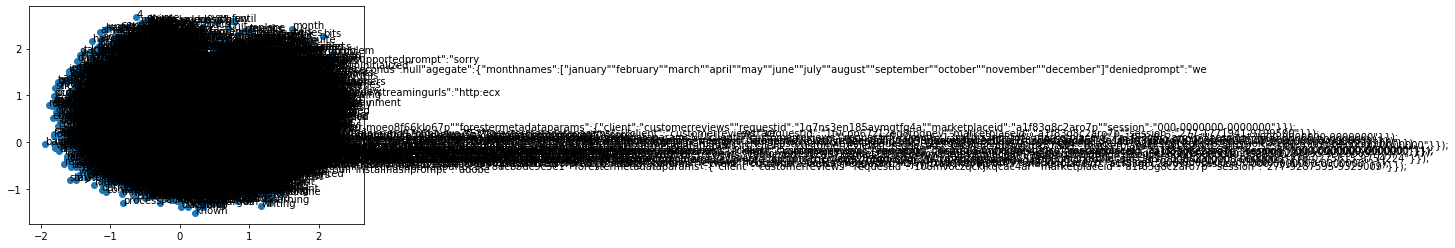

In [117]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

#fit a 2d PCA model to the vectors
X = word2vec_sg[word2vec_sg.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#create a scatter plot of the projection
pyplot.scatter(result[:,0], result[:,1])
words = list(word2vec_sg.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i,0], result[i,1]))
    
pyplot.show()

# Product Recommendation 

In [56]:
words_in_vocab= set(word2vec_sg.wv.index2word)

In [57]:
def get_cosine_similarity(row, search_vector):
    try:
        cosine_similarity = np.dot(row['vector'], search_vector)/linalg.norm(row['vector'])/linalg.norm(search_vector)
        return cosine_similarity
    except Exception as e:
        raise e

In [109]:
search_product = 'HORNBY Coach R4410A BR Hawksworth Corridor 3rd'

for i, j in enumerate(train['product_name']):
    if j == search_product:
        index_similar_product = i

search_query = train['review_vocabs'][index_similar_product]

In [110]:
search_vector = np.zeros((100,), dtype="float32")
for tag in search_query:
    if tag in words_in_vocab:
        search_vector = np.add(search_vector, w2v[tag])
        
product_vector_df['cosine_similarity'] = product_vector_df.apply(get_cosine_similarity, axis=1, args=(search_vector,))

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [111]:
df = product_vector_df.sort_values(by='cosine_similarity', ascending=False)[:10]

In [114]:
print("Maka produk yang direkomendasikan berdasarkan produk {0} adalah :".format(search_product))
df[['product', 'cosine_similarity']]

Maka produk yang direkomendasikan berdasarkan produk HORNBY Coach R4410A BR Hawksworth Corridor 3rd adalah :


,product,cosine_similarity
5921,corgi james bond 007 you only live twice littl...,1.000000
7523,Ravensburger Ben 10 Puzzleball (60 Pieces),0.984718
2600,Yugioh RA Yellow Mega Pack Sealed Booster Pack...,0.982479
3938,Kids Adults Halloween Party Knitted Hat Face E...,0.980035
2327,Parrot Bebop Drone Feet Pack,0.979834
5451,17.75 Inch Walnut and Maple Chess Board,0.979397
6114,Plastoy Tubo Lucky Luke Tube,0.978449
7837,Wooden Thomas & Friends: Terence the Tractor,0.978092
5138,Red White and Blue Triangular Bunting 10mtr,0.978059
7381,Gibsons Santa's Workshop Jigsaw Puzzle (2x500 ...,0.978045
